 1. Import Required Libraries

In [1]:
# TensorFlow and model building
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

# For data handling and visualization
import os
import numpy as np
import matplotlib.pyplot as plt


2. Set Paths and Hyperparameters

In [2]:
# Path to the dataset 
data_dir = './data_split'
train_path = os.path.join(data_dir, 'train')
test_path = os.path.join(data_dir, 'test')
img_size = (150, 150)
batch_size = 32


Step 3: Data Preprocessing

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 12648 images belonging to 10 classes.
Found 3158 images belonging to 10 classes.
Found 3956 images belonging to 10 classes.


 Step 4: Build CNN Model

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(*img_size, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\dELL\miniconda3\envs\waste-ai\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,642 (18.42 MB)

 Trainable params: 4,829,642 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Step 5: Train Model

In [5]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


c:\Users\dELL\miniconda3\envs\waste-ai\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 308s 774ms/step - accuracy: 0.3669 - loss: 1.8807 - val_accuracy: 0.5709 - val_loss: 1.2689
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 166s 420ms/step - accuracy: 0.6207 - loss: 1.1357 - val_accuracy: 0.6400 - val_loss: 1.0466
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 224s 566ms/step - accuracy: 0.7241 - loss: 0.8364 - val_accuracy: 0.6884 - val_loss: 0.9668
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 180s 455ms/step - accuracy: 0.7955 - loss: 0.6077 - val_accuracy: 0.6963 - val_loss: 0.9831
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 181s 457ms/step - accuracy: 0.8783 - loss: 0.3769 - val_accuracy: 0.7128 - val_loss: 1.0833
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 186s 468ms/step - accuracy: 0.9226 - loss: 0.2358 - val_accuracy: 0.6947 - val_loss: 1.2026
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 201s 508ms/step - accuracy: 0.9543 - loss: 0.1479 - val_accuracy: 0.7011 - val_loss: 1.4622
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 192s 484ms/step - accuracy: 0.9731 -

 Step 6: Evaluate

In [6]:
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)

# Optional: Classification report
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=test_data.class_indices.keys()))


c:\Users\dELL\miniconda3\envs\waste-ai\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3956/3956 ━━━━━━━━━━━━━━━━━━━━ 112s 28ms/step - accuracy: 0.6950 - loss: 1.8693
Test Accuracy: 0.7027300596237183
3956/3956 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step
              precision    recall  f1-score   support

     battery       0.77      0.54      0.64       189
  biological       0.67      0.55      0.60       200
   cardboard       0.69      0.72      0.70       365
     clothes       0.92      0.85      0.88      1066
       glass       0.67      0.77      0.72       613
       metal       0.48      0.42      0.45       204
       paper       0.55      0.68      0.61       336
     plastic       0.64      0.68      0.66       397
       shoes       0.60      0.66      0.63       396
       trash       0.57      0.43      0.49       190

    accuracy                           0.70      3956
   macro avg       0.66      0.63      0.64      3956
weighted avg       0.71      0.70      0.70      3956



 Step 7: Save Model

In [22]:
model.save('models/waste_classifier.h5')


Test Model with an Image

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('models/waste_classifier.h5')  

# Define image class labels (in same order as training folders)
class_names = ['battery', 'biological', 'cardboard', 'clothes',
               'glass', 'metal', 'paper', 'plastic', 'shoes' ,'trash']

# Image path
img_path = 'data_split/test/biological/biological_108.jpg'  

# Load and preprocess image
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize same as training

# Predict
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

print(f"🧾 Predicted Class: {predicted_class}")
print(f"🔢 Probabilities: {dict(zip(class_names, predictions[0]))}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
🧾 Predicted Class: biological
🔢 Probabilities: {'battery': np.float32(6.1639645e-07), 'biological': np.float32(0.9852036), 'cardboard': np.float32(0.00027763788), 'clothes': np.float32(1.15369666e-07), 'glass': np.float32(6.0486866e-05), 'metal': np.float32(2.7371855e-06), 'paper': np.float32(0.00022730965), 'plastic': np.float32(1.1624308e-08), 'shoes': np.float32(0.0142263705), 'trash': np.float32(1.1832187e-06)}


Visualize with matplotlib

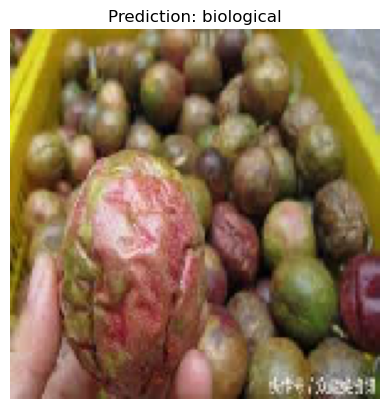

In [21]:

plt.imshow(img)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()


Class Distribution: Quantity of Images per Folder

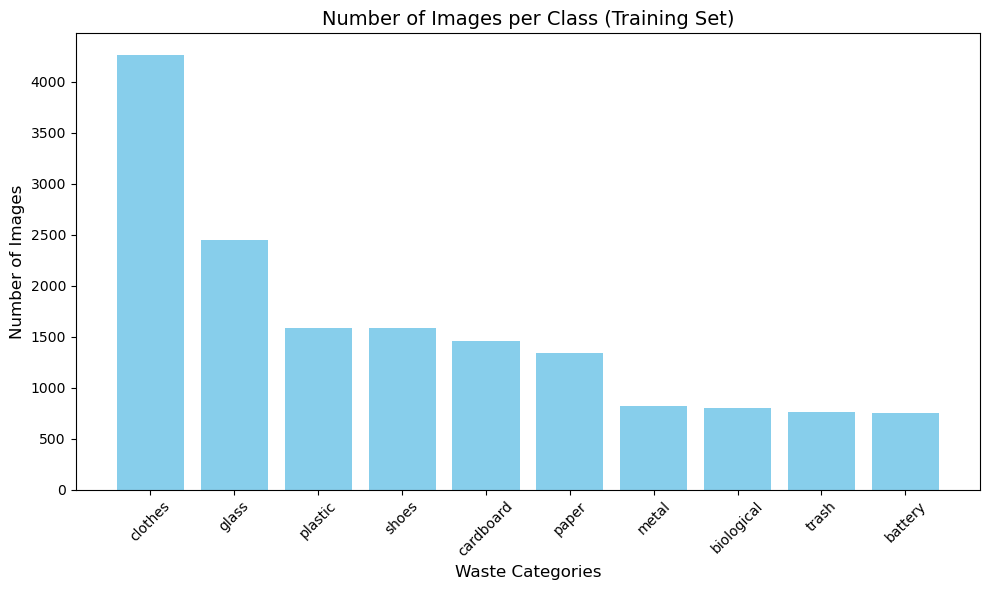

Class Distribution:
clothes: 4261 images
glass: 2448 images
plastic: 1587 images
shoes: 1581 images
cardboard: 1460 images
paper: 1344 images
metal: 816 images
biological: 797 images
trash: 757 images
battery: 755 images


In [11]:

# Define path to the training folder
train_dir = 'data_split/train/'  

# Count number of images in each class
class_counts = {folder: len(os.listdir(os.path.join(train_dir, folder)))
                for folder in os.listdir(train_dir)
                if os.path.isdir(os.path.join(train_dir, folder))}

# Sort by count
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Number of Images per Class (Training Set)', fontsize=14)
plt.xlabel('Waste Categories', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print exact numbers
print("Class Distribution:")
for k, v in class_counts.items():
    print(f"{k}: {v} images")
